# MEME Stock Performance 

Thomas Cortese, Vijay Karumathil, Khush Patel, Kesh Khanna, Morgan Swallows

[*********************100%***********************]  4 of 4 completed


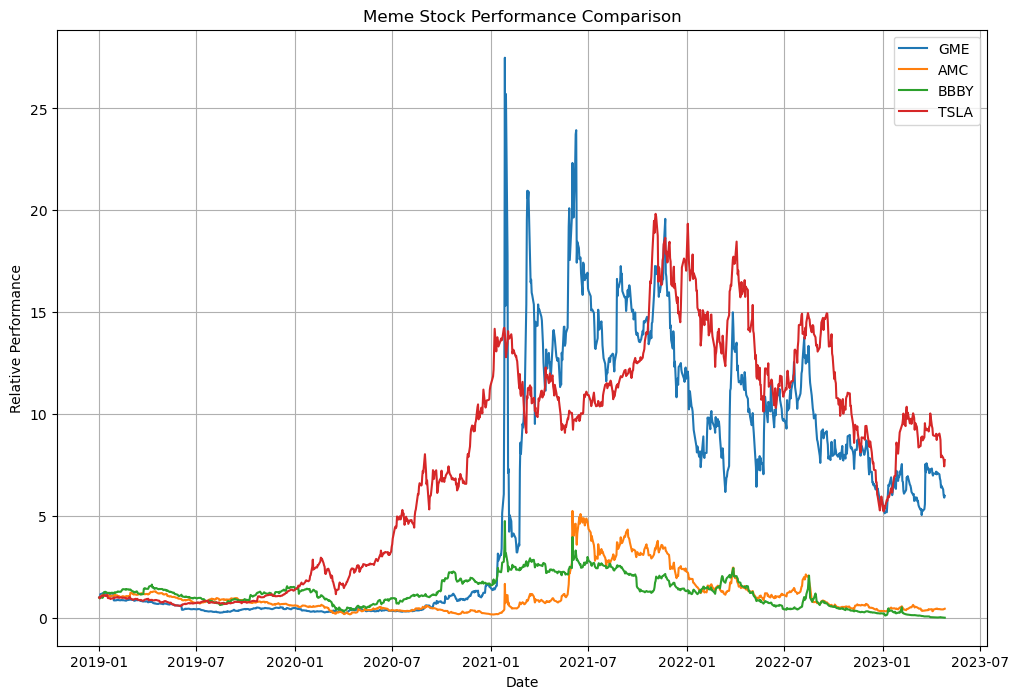

In [24]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

 

def fetch_stock_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)["Adj Close"]
    return data

def calculate_relative_performance(data):
    return data / data.iloc[0]

def plot_etf_performance(tickers, data):
    plt.figure(figsize=(12, 8))
    for ticker in tickers:
        plt.plot(data.index, data[ticker], label=ticker)

    plt.xlabel("Date")
    plt.ylabel("Relative Performance")
    plt.title("Meme Stock Performance Comparison")
    plt.legend()
    plt.grid()
    plt.show()

def main():
    tickers = ["GME", "AMC", "BBBY", "TSLA"]  # Add or replace with your desired meme stock tickers
    start_date = "2019-01-01"
    end_date = "2023-04-28"
    stock_data = fetch_stock_data(tickers, start_date, end_date)
    rel_performance = calculate_relative_performance(stock_data)
    plot_etf_performance(tickers, rel_performance)

if __name__ == "__main__":

    main()

# Frequency of Meme Stocks Mentioned on r/WallStreetBets (past year)

      Frequency
GME         228
AMC         203
BBBY        237
TSLA        231


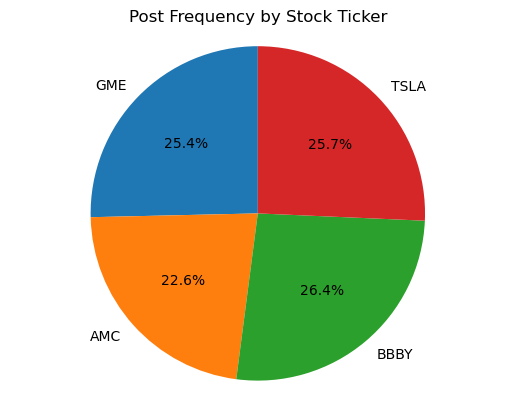

In [14]:
import praw
import pandas as pd
import matplotlib.pyplot as plt

# Replace these with your own Reddit API credentials
client_id = '' # Your Client ID Here 
client_secret = '' # Your secret client ID here 
user_agent = '' # Your User Agent Here

reddit = praw.Reddit(client_id=client_id, client_secret=client_secret, user_agent=user_agent)

stock_tickers = ['GME', 'AMC', 'BBBY', 'TSLA']
ticker_counts = {ticker: 0 for ticker in stock_tickers}
count = 1000

def fetch_posts(ticker, subreddit, count):
    subreddit = reddit.subreddit(subreddit)
    posts = subreddit.search(ticker, limit=count, time_filter='year')
    return [post for post in posts if ticker in post.title.upper()]

total_posts = 0

for ticker in stock_tickers:
    posts = fetch_posts(ticker, 'wallstreetbets', count)
    ticker_counts[ticker] = len(posts)
    total_posts += len(posts)

df = pd.DataFrame.from_dict(ticker_counts, orient='index', columns=['Frequency'])
print(df)

fig, ax = plt.subplots()
ax.pie(df['Frequency'], labels=df.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

plt.title('Post Frequency by Stock Ticker')
plt.show()

# Frequency of Meme Stocks Mentioned on r/WallStreetBets (all-time)

      Frequency
GME         241
AMC         211
BBBY        237
TSLA        231


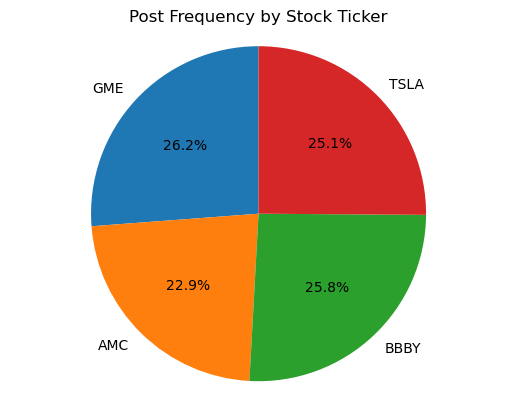

In [25]:
import praw
import pandas as pd
import matplotlib.pyplot as plt

# Replace these with your own Reddit API credentials
client_id = '' # Your Client ID Here 
client_secret = '' # Your secret client ID here 
user_agent = '' # Your User Agent Here

reddit = praw.Reddit(client_id=client_id, client_secret=client_secret, user_agent=user_agent)

stock_tickers = ['GME', 'AMC', 'BBBY', 'TSLA']
ticker_counts = {ticker: 0 for ticker in stock_tickers}

#limit increased for all time search

count = 2000 

def fetch_posts(ticker, subreddit, count):
    subreddit = reddit.subreddit(subreddit)
    posts = subreddit.search(ticker, limit=count, time_filter='all')
    return [post for post in posts if ticker in post.title.upper()]

total_posts = 0

for ticker in stock_tickers:
    posts = fetch_posts(ticker, 'wallstreetbets', count)
    ticker_counts[ticker] = len(posts)
    total_posts += len(posts)

df = pd.DataFrame.from_dict(ticker_counts, orient='index', columns=['Frequency'])
print(df)

fig, ax = plt.subplots()
ax.pie(df['Frequency'], labels=df.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

plt.title('Post Frequency by Stock Ticker')
plt.show()

Unexpected Results:

Originally the goal of the project was to plot how frequently each meme stock was being mentioned on a day to basis using a line graph similar to the retruns plot and compare that to their overall returns in the last few years.  However, our team ran into an unexpected result with Reddit's API and PRAW Module.  Unfortunately without paying a monthly subscription to use the Business Version of Reddit's API key, the data that you are able to scrape from the platform is extremely limited.  While we had referenced in the script that the search should be for all-time, the overall number of posts with the tickers in the title is nearly identical.  Moreover, it appears the number of reddit posts that can be extracted from the platform is limited using the free API.  

However, the data was nonetheless very interesting despite the relatively small sample size.  A specific metric that stood out to the team was that the meme stocks were mentioned almost an identical amount of times over the last year.  While we are not entirely confident the result for the all time amount of submissions is accurate due to the API limitations, it is interesting to note the occurence was also seen with that time filter as well.